In [1]:
import numpy as np
import os
import cv2
import glob
import matplotlib.pyplot as plt
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [2]:
insightface.__version__

'0.7.3'

In [3]:
app = FaceAnalysis(name = 'buffalo_l')
app.prepare(ctx_id = 0,det_size=(640, 640))
#download 'inswapper_128.onnx' (https://huggingface.co/ezioruan/inswapper_128.onnx/tree/main)
swapper = insightface.model_zoo.get_model('inswapper_128.onnx',download=False, download_zip=False)
def swap_face(source_img,target_img,id=0):
    source_faces = app.get(source_img)
    target_faces = app.get(target_img)
    res = target_img.copy()
    for face in target_faces:
        res = swapper.get(res,face,source_faces[id],paste_back = True)
    plt.subplots(1,3,figsize=(10, 20))
    plt.subplot(1,3,1).imshow(target_img[:,:,::-1])
    plt.axis('off')
    plt.subplot(1,3,2).imshow(source_img[:,:,::-1])
    plt.axis('off')
    plt.subplot(1,3,3).imshow(res[:,:,::-1])
    plt.axis('off')
    cv2.imwrite('output.jpg', res)


Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CUDAExecutionProvider': {'do_copy_in_default_stream': '1', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'device_id': '0', 'gpu_external_alloc': '0', 'enable_cuda_graph': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_free': '0', 'gpu_external_empty_cache': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'cudnn_conv_use_max_workspace': '1', 'cudnn_conv1d_pad_to_nc1d': '0', 'tunable_op_enable': '0', 'tunable_op_tuning_enable': '0', 'enable_skip_layer_norm_strict_mode': '0'}, 'CPUExecutionProvider': {}}
find model: C:\Users\Admin/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CUDAExecutionProvider': {'do_copy_in_default_stream': '1', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'device_id': '0', 'gpu_external_alloc': '0', 'enable_cuda_graph': '0', 'gpu_mem_limit': '18446744073

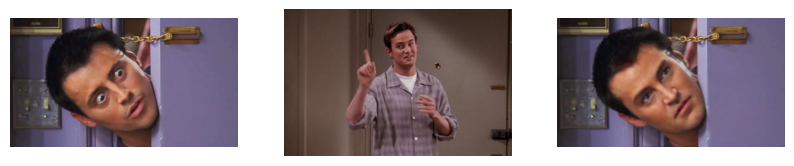

In [5]:
source_img = cv2.imread('source.jpeg')
target_img = cv2.imread('target.webp')
#img3 = cv2.imread('image2.jpeg')
swap_face(source_img,target_img,0)